# Problem Statement 
Insurance premiums are often based on various factors that in the end decide the amount that will be covered from the insurance company. 
As a data analyst/scientist you are given a set of historical data for an organizations customers and the respective charges that were levied upon the insurance company. 

The data gives you the information about the users including their age, sex, bmi, hospitalization history, annual income, etc. Analyze and gather insights fron the data and create a linear regression model that will best predict the insurance charges for a new set of data. 

## Dataset Information
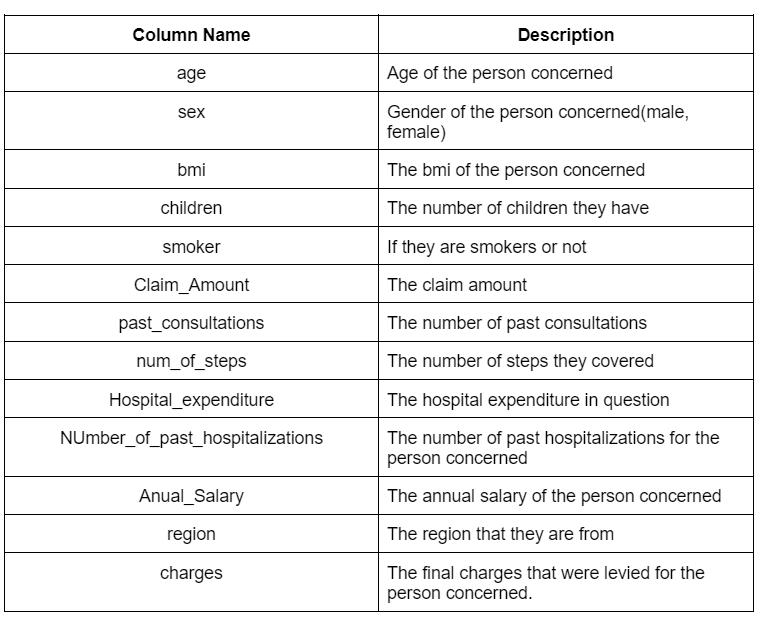

## Importing Initial Python Packages to build an approach towards the business Problem 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Loading the dataset 

In [ ]:
insurance = pd.read_csv('new_insurance_data.csv')

In [ ]:
insurance.head() 

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [ ]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
insurance.shape

(1338, 13)

In [ ]:
insurance.ndim

2

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
insurance.describe().round()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.0,1335.0,1333.0,1324.0,1332.0,1335.0,1334.0,1336.0,1.332000e+03,1338.0
mean,39.0,31.0,1.0,33361.0,15.0,910005.0,15841792.0,1.0,3.696849e+08,13270.0
std,14.0,6.0,1.0,15617.0,7.0,91886.0,26693048.0,1.0,5.668843e+08,12110.0
min,18.0,16.0,0.0,1920.0,1.0,695430.0,29453.0,0.0,2.747072e+06,1122.0
25%,27.0,26.0,0.0,20769.0,9.0,847200.0,4077633.0,1.0,7.701932e+07,4740.0
50%,39.0,30.0,1.0,33700.0,15.0,914300.0,7490337.0,1.0,1.419361e+08,9382.0
75%,51.0,35.0,2.0,45052.0,20.0,971684.0,10840822.0,1.0,3.243499e+08,16640.0
max,64.0,53.0,5.0,77278.0,40.0,1107872.0,261631699.0,3.0,4.117197e+09,63770.0


## Checking the distribution of each of the variables in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


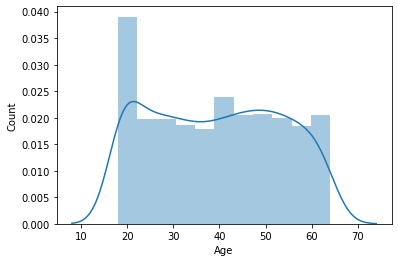

In [ ]:
#distribution of age column
sns.distplot(x=insurance['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Interpretations From the plot
The distribution is not normally distributed, and peaks towards 20. 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


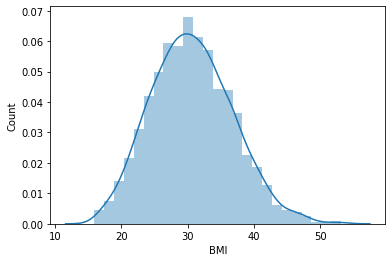

In [ ]:
#distribution of bmi column
sns.distplot(x=insurance['bmi'])
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution can be assumed as a normal distribution that peaks towards 30. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


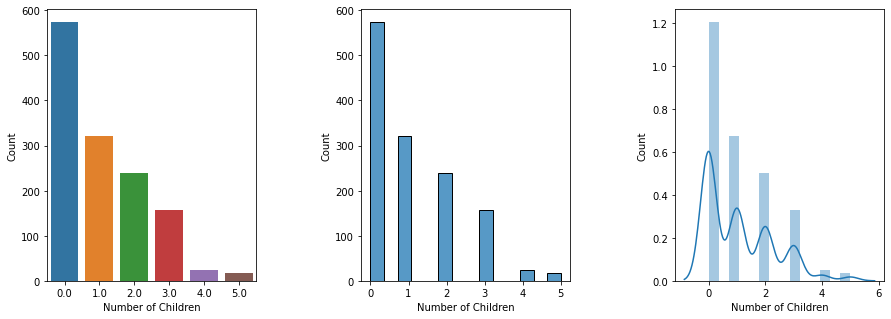

In [ ]:
#distribution of children column
plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The distribution is not normally distributed, and we can deduce that most of the customers do not have child in the data. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


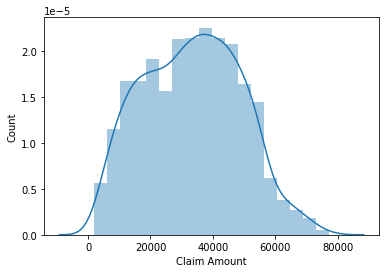

In [ ]:
#distribution of claim amount
sns.distplot(x=insurance['Claim_Amount'])
plt.xlabel('Claim Amount')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution is right skewed - majority of the claim amount falls unders the lower ranges of the entire data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


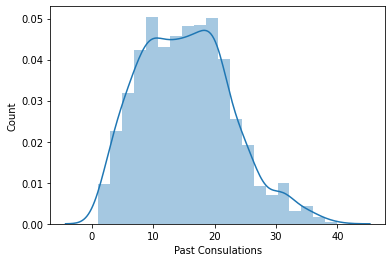

In [ ]:
#distribution of past consultations
sns.distplot(x=insurance['past_consultations'])
plt.xlabel('Past Consulations')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The past consultations is right skewed, most of the consultations falls under 25. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


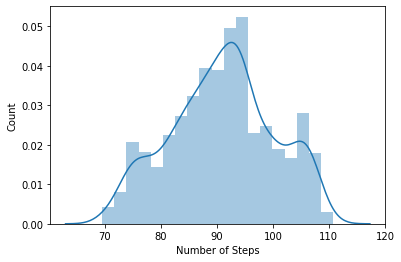

In [ ]:
#distribution of number of steps column 
inss = insurance.copy()
inss['num_of_steps'] = inss['num_of_steps'].div(10000).round(2)
sns.distplot(x=inss['num_of_steps'])
plt.xlabel('Number of Steps')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The distribution can roughly be assumed as a normal distribution, but the plot is left skewed. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


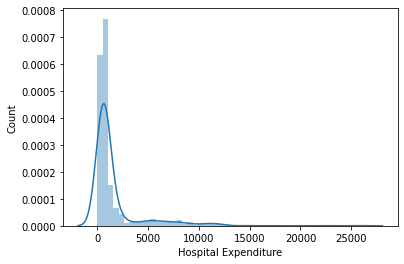

In [ ]:
#distribution of hospital expenditure
inss['Hospital_expenditure'] = inss['Hospital_expenditure'].div(10000).round(2)
sns.distplot(x=inss['Hospital_expenditure'])
plt.xlabel('Hospital Expenditure')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
the distribution is right skewed for the hospital Expenditure

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


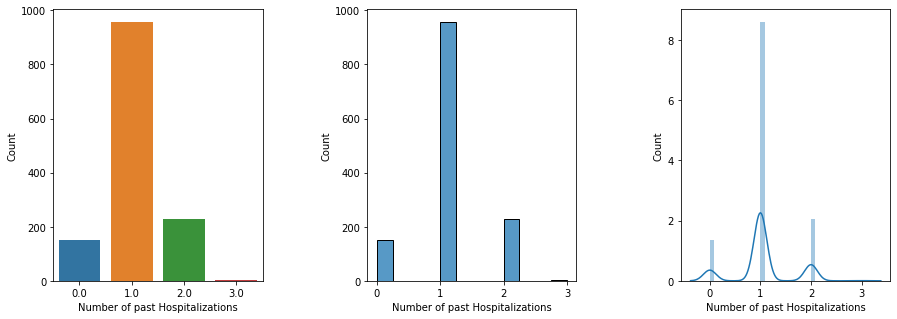

In [ ]:
#distribution of number of past hospitalizations
plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['NUmber_of_past_hospitalizations'])
plt.xlabel('Number of past Hospitalizations')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The plot shows the customers with 1.0 past hostpitalizations as the highest in the distribution followed by 2.0, 0.0, and 3.0 hospitalizations

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


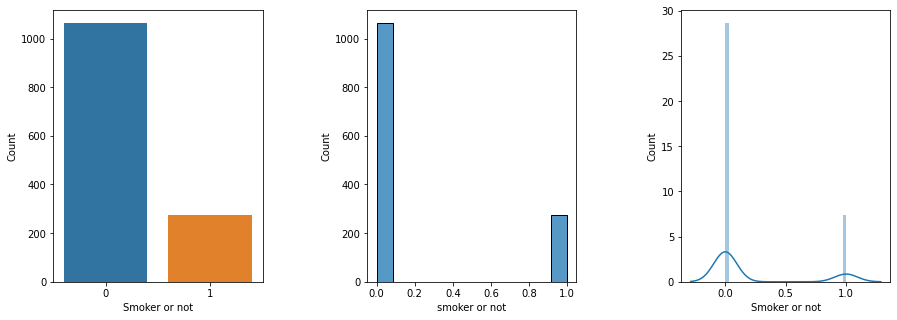

In [ ]:
#distribution of smokers column
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
insurance['smoker'] = le.fit_transform(insurance['smoker'])
insurance['smoker'] = insurance['smoker'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['smoker'])
plt.xlabel('Smoker or not')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['smoker'])
plt.xlabel('smoker or not')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['smoker'])
plt.xlabel('Smoker or not')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
Majority of the distribution shows the presence of non smokers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


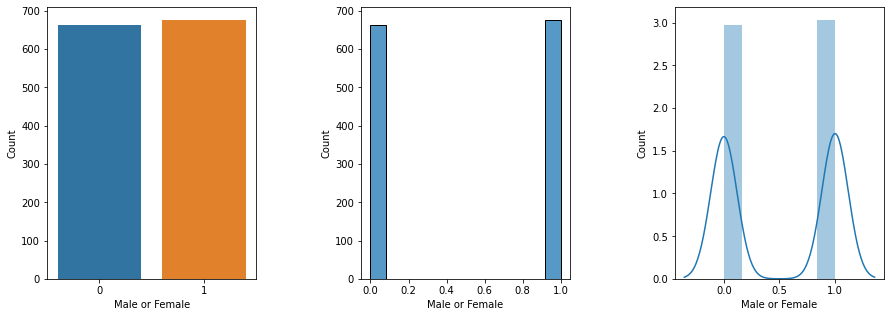

In [ ]:
#distribution of the sex column

insurance['sex'] = le.fit_transform(insurance['sex'])
insurance['sex'] = insurance['sex'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['sex'])
plt.xlabel('Male or Female')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The gender column shows the presence of males slighly higher than the female customers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


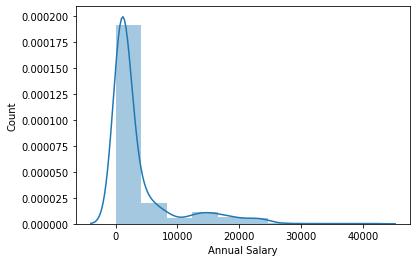

In [ ]:
#distribution of annual salary 
ins_dum = insurance.copy()
ins_dum['Anual_Salary'] = ins_dum['Anual_Salary'].div(100000).round(2)
sns.distplot(x=ins_dum['Anual_Salary'], bins=10)
plt.xlabel('Annual Salary')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The annual salary distribution is right skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


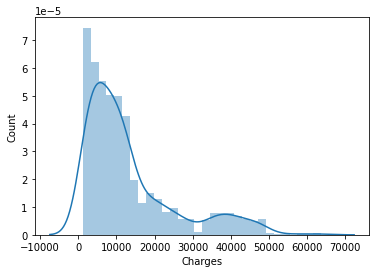

In [ ]:
#distribution of charges column
sns.distplot(x=insurance['charges'])
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

### Interpretations from the plot
The charges column is also right skewed. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


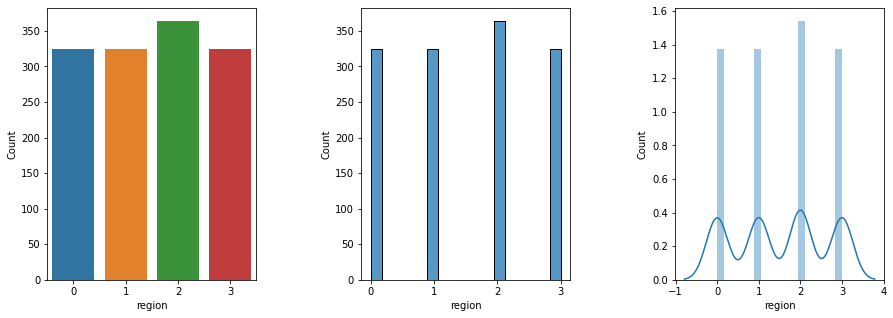

In [ ]:
#distribution of reagions column 
insurance['region'] = le.fit_transform(insurance['region'])
insurance['region'] = insurance['region'].astype(int)

plt.subplots(1,3, figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=insurance['region'])
plt.xlabel('region')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Interpretations from the plot
The region column shows the data distributed equally in the entire population.

## Measure of Peakedness and Outlier Analysis using Boxplots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


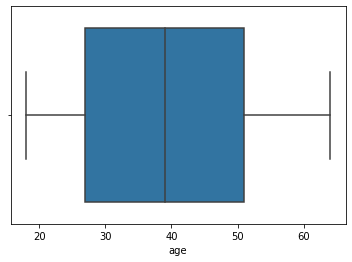

In [ ]:
sns.boxplot(insurance['age'])

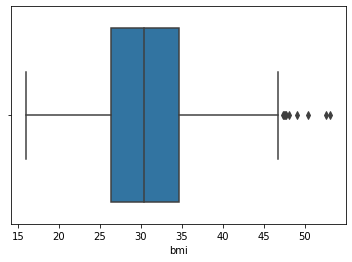

In [ ]:
sns.boxplot(x=insurance['bmi'])

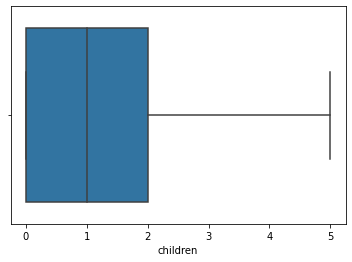

In [ ]:
sns.boxplot(x=insurance['children'])

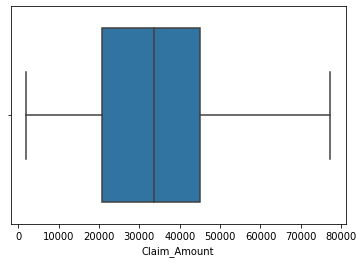

In [ ]:
sns.boxplot(x=insurance['Claim_Amount'])

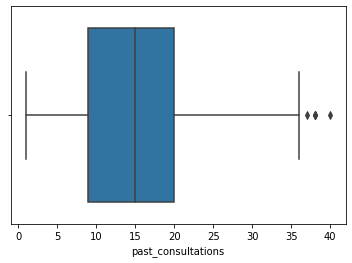

In [ ]:
sns.boxplot(x=insurance['past_consultations'])

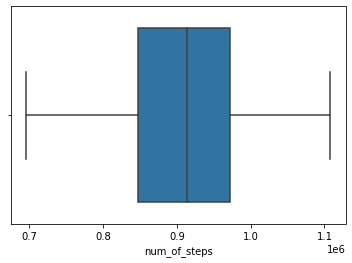

In [ ]:
sns.boxplot(x=insurance['num_of_steps'])

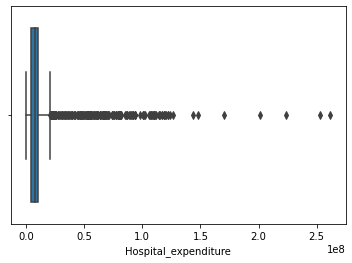

In [ ]:
sns.boxplot(x=insurance['Hospital_expenditure'])

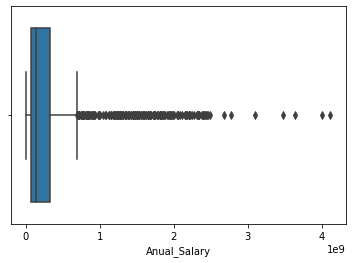

In [ ]:
sns.boxplot(x=insurance['Anual_Salary'])

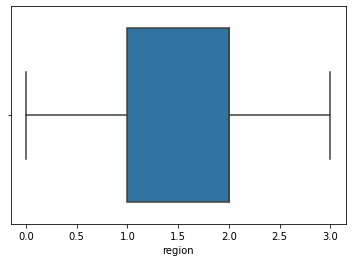

In [ ]:
sns.boxplot(x=insurance['region'])

### Interpretations from the plot

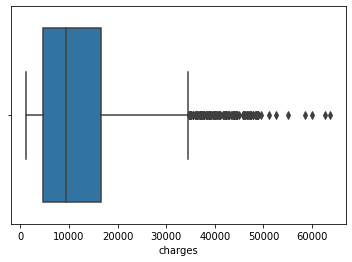

In [ ]:
sns.boxplot(x=insurance['charges'])

### Interpretations from the plots
There is a presence of outliers in the columns 'charges', 'annual_salary', 'hospital_expenditure', 'past_consultations', 'bmi', etc. 
1. We will not treat the outliers, since the target variable also consists of outliers which is driven from the other independent variables.

## Understanding the relationship between the dependent and independent variables using a pairplot

<Figure size 720x360 with 0 Axes>

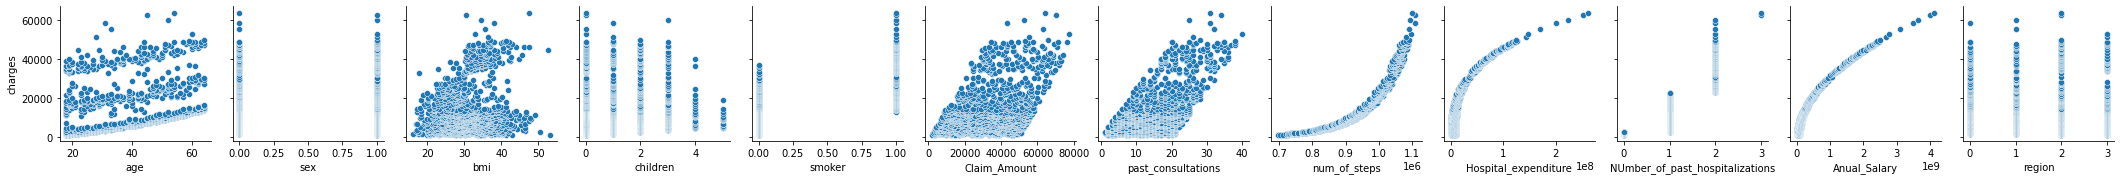

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data=insurance, y_vars=['charges'], x_vars=['age', 
                                                         'sex', 
                                                         'bmi', 
                                                         'children', 
                                                         'smoker', 
                                                         'Claim_Amount',
                                                         'past_consultations',
                                                         'num_of_steps',
                                                         'Hospital_expenditure',
                                                         'NUmber_of_past_hospitalizations',
                                                         'Anual_Salary', 
                                                         'region'])

### Interpretations from the scatter plots
1. Several of the features shows a positive linear relationship with the target variable. These features will be further analyzed w.r.t the correlation to reach a conclusion for their usability in the linear regression model.

## Data Imputation 

In [ ]:
insurance.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

### Approach for data imputation in the insurance data. 
1. We have replaced the null values with the mean in columns where it showed close to a normal distribution i.e age, bmi, claim_amount, past_consultations, num_of_steps.
2. For the distributions that showed a skewed distribution, we have replaced the null values with the median of the column.

In [ ]:
insurance['age'] = insurance['age'].fillna(insurance['age'].mean())
insurance['bmi'] = insurance['bmi'].fillna(insurance['bmi'].mean())
insurance['children'] = insurance['children'].fillna(insurance['children'].median())
insurance['Claim_Amount'] = insurance['Claim_Amount'].fillna(insurance['Claim_Amount'].mean())
insurance['past_consultations'] = insurance['past_consultations'].fillna(insurance['past_consultations'].mean())
insurance['num_of_steps'] = insurance['num_of_steps'].fillna(insurance['num_of_steps'].mean())
insurance['Hospital_expenditure'] = insurance['Hospital_expenditure'].fillna(insurance['Hospital_expenditure'].median())
insurance['NUmber_of_past_hospitalizations'] = insurance['NUmber_of_past_hospitalizations'].fillna(insurance['NUmber_of_past_hospitalizations'].median())
insurance['Anual_Salary'] = insurance['Anual_Salary'].fillna(insurance['Anual_Salary'].median())

In [ ]:
insurance.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

## Feature Selection for Data Modeling

In [ ]:
correlation = insurance.corr()
correlation

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
age,1.000000,-0.019105,0.112161,0.041616,-0.028868,0.122828,0.168311,0.512985,0.137146,0.359434,0.163392,0.004659,0.293604
sex,-0.019105,1.000000,0.045170,0.018533,0.076185,-0.003884,0.050403,0.010342,0.069940,0.000214,0.072702,0.004588,0.057292
bmi,0.112161,0.045170,1.000000,0.007755,0.003610,0.093313,0.130667,0.135903,0.256892,0.137043,0.241505,0.158261,0.198691
children,0.041616,0.018533,0.007755,1.000000,0.009608,0.041502,0.054832,0.163487,0.025315,0.185546,0.041260,0.015011,0.070877
smoker,-0.028868,0.076185,0.003610,0.009608,1.000000,0.334406,0.502836,0.665711,0.662698,0.588682,0.739676,-0.002181,0.787251
Claim_Amount,0.122828,-0.003884,0.093313,0.041502,0.334406,1.000000,0.271482,0.398342,0.369921,0.379889,0.403974,0.009028,0.435635
past_consultations,0.168311,0.050403,0.130667,0.054832,0.502836,0.271482,1.000000,0.559682,0.542172,0.500131,0.589304,-0.001866,0.627592
num_of_steps,0.512985,0.010342,0.135903,0.163487,0.665711,0.398342,0.559682,1.000000,0.624835,0.845128,0.733685,-0.041920,0.889848
Hospital_expenditure,0.137146,0.069940,0.256892,0.025315,0.662698,0.369921,0.542172,0.624835,1.000000,0.651827,0.957189,0.029446,0.871796
NUmber_of_past_hospitalizations,0.359434,0.000214,0.137043,0.185546,0.588682,0.379889,0.500131,0.845128,0.651827,1.000000,0.735802,-0.031450,0.820682


### Inferences
There is a strong to moderate correlation with the charges column with the following columns:
1. smoker
2. Claim_Amount	
3. past_consultations	
4. num_of_steps	
5. Hospital_expenditure	
6. NUmber_of_past_hospitalizations	
7. Anual_Salary

The column 'age', 'sex', 'region', 'children', 'sex' shows no considerable correlation with the charges column, so we will not be considering these features for the initial model.


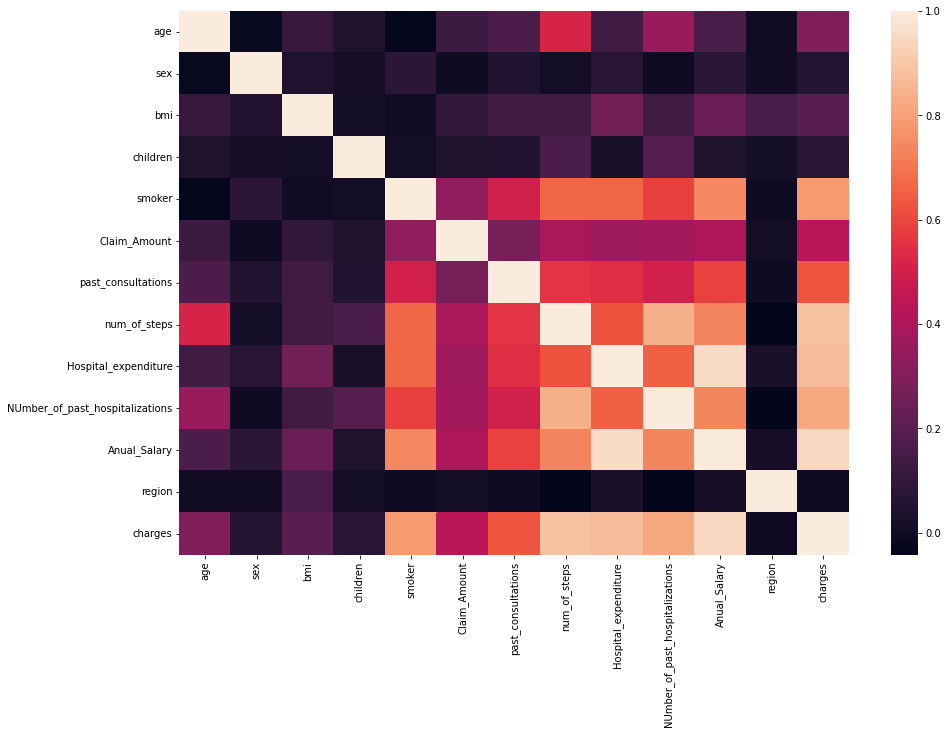

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation)

### The correlation heatmap shows the columns that will be most useful for the modeling. The sex, children, and region column shows no considerable correlation. 

## Data Preprocessing Before Model Training

### Splitting the insurance data for 3 separate models 
1. We are considering the features with strong correlation for the model one.
2. For the next model, we are considering all the features present in the data.
3. For the last model, we will consider the features except region, sex, and children

In [ ]:
from sklearn.model_selection import train_test_split
#splitting the data for model 1 
X = insurance.drop(['charges', 'age', 'sex', 'bmi', 'children', 'region'], axis=1)
y = insurance.iloc[:,-1]

#splitting the data for model 2 
X2 = insurance.drop(['charges'], axis=1)

#splitting the data for model 3
X3 = insurance.drop(['charges', 'region', 'sex', 'children'], axis=1)

#splitting the data for model 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#splitting the data for model 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=42)
#splitting the data for model 3
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.3, random_state=42)

### Standardizing the features 
Normalizing the features so that the samples will have the same mean and standard deviation. 

In [ ]:
#feature scaling using the standardscalar 
from sklearn.preprocessing import StandardScaler
#scaling the data 
sc = StandardScaler()
#model 1
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#model 2
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)
#model 3
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)

In [ ]:
#model 1
y_train_arr = y_train.values
y_train = y_train_arr.reshape((-1,1))
#model 2
y_train_arr2 = y_train2.values
y_train2 = y_train_arr2.reshape((-1,1))
#model 3
y_train_arr3 = y_train3.values
y_train3 = y_train_arr3.reshape((-1,1))

In [ ]:
#model 1
y_train = sc.fit_transform(y_train)
#model 2
y_train2 = sc.fit_transform(y_train2)
#model 3
y_train3 = sc.fit_transform(y_train3)

## Model Building

In [ ]:
from sklearn.linear_model import LinearRegression

model_uno = LinearRegression()
model_dos = LinearRegression()
model_tres = LinearRegression()

#fitting the model 1
model_uno.fit(X_train, y_train)

#fitting the model 2
model_dos.fit(X_train2, y_train2)

#fitting the model 3
model_tres.fit(X_train3, y_train3)


LinearRegression()

### Making predictions 
1. We are making predictions on the test set of each of the 3 models.

In [ ]:
#predictions - Model 1
predictions = model_uno.predict(X_test)
predictions = sc.inverse_transform(predictions)

#predictions - Model 2 
predictions_2 = model_dos.predict(X_test2)
predictions_2 = sc.inverse_transform(predictions_2)

#predictions - Model 3
predictions_3 = model_tres.predict(X_test3)
predictions_3 = sc.inverse_transform(predictions_3)

## Model Evaluation

### Approach for the evaluation 
1. We are calculating the r2 score and adjusted r2 score for each of the models.
2. We are comparing the rmse on the 3 models w.r.t testing set.
3. We are compating the mean absolute percentage error for the 3 models w.r.t testing set.

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import *

#r2 and adjusted r2 
#model 1 - test 
mode_uno_r2 = r2_score(y_test, predictions)
mode_uno_adj_r2 = 1 - (1 - mode_uno_r2 )*len(y_train)/(len(y_train)-X_train.shape[1]-1)

#model 2 - test
mode_dos_r2 = r2_score(y_test2, predictions_2)
mode_dos_adj_r2 = 1 - (1 - mode_dos_r2 )*len(y_train2)/(len(y_train2)-X_train2.shape[1]-1)

#model 3 - test
mode_tres_r2 = r2_score(y_test3, predictions_3)
mode_tres_adj_r2 = 1 - (1 - mode_tres_r2 )*len(y_train3)/(len(y_train3)-X_train3.shape[1]-1)


print("r2 score for model 1 is :{} and adj_r2 for model 1 is: {}".format(mode_uno_r2, mode_uno_adj_r2))
print("r2 score for model 2 is :{} and adj_r2 for model 2 is: {}".format(mode_dos_r2, mode_dos_adj_r2))
print("r2 score for model 3 is :{} and adj_r2 for model 3 is: {}".format(mode_tres_r2, mode_tres_adj_r2))

r2 score for model 1 is :0.9710003320556408 and adj_r2 for model 1 is: 0.9707818788131222
r2 score for model 2 is :0.9749946510336307 and adj_r2 for model 2 is: 0.9746662979663956
r2 score for model 3 is :0.9763826869022649 and adj_r2 for model 3 is: 0.9761276403245356


### Inferences from the r2 score of each model
1. The r2 score gives the goodness of fit, and the model 3 shows the high percentage of r2 and adjusted r2 score.  

In [ ]:
#Comparing rmse values for the models 
#rmse for model 1 - Train and test 
rmse_on_test1 = mean_squared_error(y_test, predictions, squared=False)

#rmse for model 2 - Train and test 
rmse_on_test2 = mean_squared_error(y_test2, predictions_2, squared=False)

#rmse for model 3 - Train and test
rmse_on_test3 = mean_squared_error(y_test3, predictions_3, squared=False)

print("rmse for model 1 on test is:{}".format(rmse_on_test1))
print("rmse for model 2 on test is:{}".format(rmse_on_test2))
print("rmse for model 3 on test is:{}".format(rmse_on_test3))

rmse for model 1 on test is:2153.1529328107426
rmse for model 2 on test is:1979.2331505811073
rmse for model 3 on test is:1900.2087171179073


### Inferences fromm the rmse score of each of the 3 models
The difference between the rmse calculated on the test set for the model 3 shows the highest efficiency when compared to the other models overall. 

In [ ]:
#mean absolute percentage error
#model 1 - train and test 
mape_on_test1 = mean_absolute_percentage_error(y_test, predictions)

#model 2 - train and test
mape_on_test2 = mean_absolute_percentage_error(y_test2, predictions_2)

#model 3 - train and test
mape_on_test3 = mean_absolute_percentage_error(y_test3, predictions_3)

print("mean absolute percentage error for model 1 on test: {}".format(mape_on_test1))
print("mean absolute percentage error for model 2 on test: {}".format(mape_on_test2))
print("mean absolute percentage error for model 3 on test: {}".format(mape_on_test3))

mean absolute percentage error for model 1 on test: 0.1500507322845217
mean absolute percentage error for model 2 on test: 0.14586071129251083
mean absolute percentage error for model 3 on test: 0.14866293982721088


### Inferences from the mean absolute percentage error of the three models
1. The mape on the model 3 shows the highest efficiency on the test set. 

## Plotting the best fit line for model 1, 2 and 3.

In [ ]:
#model 1 
error_pred=pd.DataFrame(columns={'Actual_data','Prediction_data'})

error_pred['Actual_data']=y_test
error_pred['Prediction_data']=predictions
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

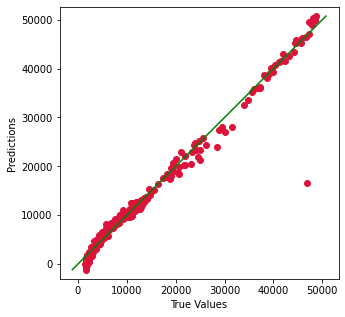

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred['Actual_data'], error_pred['Prediction_data'], c='crimson')

p1 = max(max(error_pred['Prediction_data']), max(error_pred['Actual_data']))
p2 = min(min(error_pred['Prediction_data']), min(error_pred['Actual_data']))
plt.plot([p1, p2], [p1, p2], '-g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

In [ ]:
#model 2 
error_pred=pd.DataFrame(columns={'Actual_data','Prediction_data'})

error_pred['Actual_data']=y_test2
error_pred['Prediction_data']=predictions_2
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

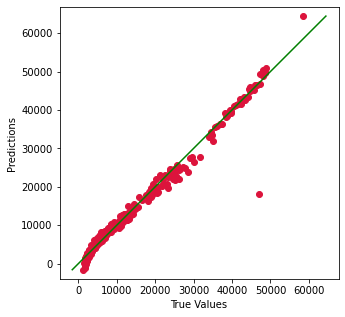

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred['Actual_data'], error_pred['Prediction_data'], c='crimson')

p1 = max(max(error_pred['Prediction_data']), max(error_pred['Actual_data']))
p2 = min(min(error_pred['Prediction_data']), min(error_pred['Actual_data']))
plt.plot([p1, p2], [p1, p2], '-g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

In [ ]:
#model 3
error_pred=pd.DataFrame(columns={'Actual_data','Prediction_data'})

error_pred['Actual_data']=y_test3
error_pred['Prediction_data']=predictions_3
error_pred['Error']=error_pred['Actual_data']-error_pred['Prediction_data']

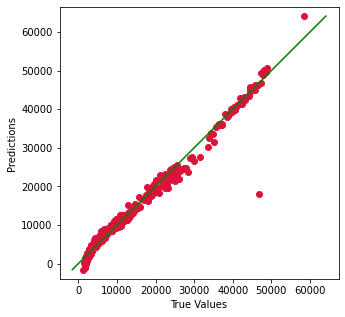

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(error_pred['Actual_data'], error_pred['Prediction_data'], c='crimson')

p1 = max(max(error_pred['Prediction_data']), max(error_pred['Actual_data']))
p2 = min(min(error_pred['Prediction_data']), min(error_pred['Actual_data']))
plt.plot([p1, p2], [p1, p2], '-g')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()